In [20]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
import matplotlib.pyplot as plt
from time import time
# fix random seed for reproducibility
numpy.random.seed(7)

In [21]:
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [22]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None)

In [30]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
# Fit the model
history = model.fit(X, Y, epochs=10, callbacks=[tensorboard], validation_split=0.1, batch_size=10)

Train on 691 samples, validate on 77 samples
Epoch 1/10
691/691 [==============================] - 0s 203us/step - loss: 0.5784 - acc: 0.7091 - val_loss: 0.6498 - val_acc: 0.7013
Epoch 2/10
691/691 [==============================] - 0s 115us/step - loss: 0.5713 - acc: 0.6961 - val_loss: 0.6494 - val_acc: 0.7403
Epoch 3/10
691/691 [==============================] - 0s 113us/step - loss: 0.5600 - acc: 0.7164 - val_loss: 0.7566 - val_acc: 0.6234
Epoch 4/10
691/691 [==============================] - 0s 138us/step - loss: 0.5720 - acc: 0.7250 - val_loss: 0.7755 - val_acc: 0.5974
Epoch 5/10
691/691 [==============================] - 0s 106us/step - loss: 0.5732 - acc: 0.7178 - val_loss: 0.7508 - val_acc: 0.6234
Epoch 6/10
691/691 [==============================] - 0s 117us/step - loss: 0.5789 - acc: 0.6889 - val_loss: 0.7796 - val_acc: 0.6364
Epoch 7/10
691/691 [==============================] - 0s 111us/step - loss: 0.5660 - acc: 0.7019 - val_loss: 0.6559 - val_acc: 0.6104
Epoch 8/10
691/69

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


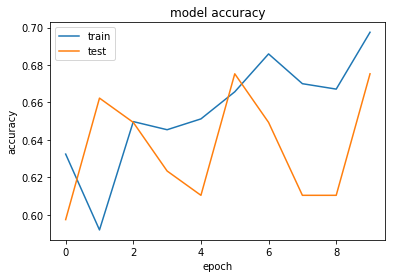

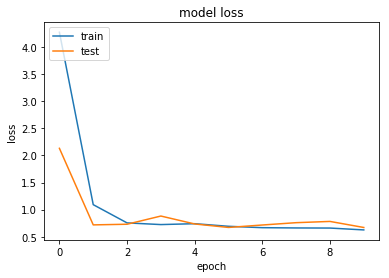

In [7]:
# plot trainning history
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

768/768 [==============================] - 0s 21us/step

acc: 66.93%


In [9]:
predictions = model.predict(X)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0,

In [10]:
# the data, split between train and test sets
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [11]:
x_test.shape

(10000, 28, 28)

In [12]:
input_shape = x_train.shape[1:]

In [13]:
x_test[1].shape

(28, 28)

In [14]:
#plot learning rate
import keras
import tensorflow as tf
from keras import backend as K
class SGDLearningRateTracker(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        _lr = tf.to_float(optimizer.lr, name='ToFloat')
        _decay = tf.to_float(optimizer.decay, name='ToFloat')
        _iter = tf.to_float(optimizer.iterations, name='ToFloat')

        lr = K.eval(_lr * (1. / (1. + _decay * _iter)))
        print(' - LR: {:.6f}\n'.format(lr))

plt_lr = SGDLearningRateTracker()

In [15]:
import keras.backend as K
from keras.callbacks import LearningRateScheduler
 
def scheduler(epoch):
    # 每隔100个epoch，学习率减小为原来的1/10
    if epoch % 2 == 0 and epoch != 0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr * 0.1)
        print("lr changed to {}".format(lr * 0.1))
    return K.get_value(model.optimizer.lr)
 
reduce_lr = LearningRateScheduler(scheduler)

In [16]:
from keras import optimizers
from keras.layers import Input, Flatten, Dense, Dropout, Lambda
from keras.models import Model
# create model
def create_base_network(input_shape):
    '''Base network to be shared (eq. to feature extraction).
    '''
    input = Input(shape=input_shape)
    x = Flatten()(input)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(10, activation='relu')(x)
    return Model(input, x)

y_train = keras.utils.to_categorical(y_train, num_classes=10)
model = create_base_network(input_shape)
optimizer = optimizers.SGD(lr=0.01, momentum=0.9, decay=1e-5, nesterov=True)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, callbacks=[plt_lr, reduce_lr], validation_split=0.1, batch_size=20)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 7s 135us/step - loss: nan - acc: 0.1237 - val_loss: nan - val_acc: 0.0978
 - LR: 0.009737

Epoch 2/10
54000/54000 [==============================] - 7s 133us/step - loss: nan - acc: 0.0988 - val_loss: nan - val_acc: 0.0978
 - LR: 0.009488

Epoch 3/10
lr changed to 0.0009999999776482583
54000/54000 [==============================] - 6s 109us/step - loss: nan - acc: 0.0988 - val_loss: nan - val_acc: 0.0978
 - LR: 0.000925

Epoch 4/10
54000/54000 [==============================] - 7s 136us/step - loss: nan - acc: 0.0988 - val_loss: nan - val_acc: 0.0978
 - LR: 0.000903

Epoch 5/10
lr changed to 9.999999310821295e-05
54000/54000 [==============================] - 6s 115us/step - loss: nan - acc: 0.0988 - val_loss: nan - val_acc: 0.0978
 - LR: 0.000088

Epoch 6/10
54000/54000 [==============================] - 6s 110us/step - loss: nan - acc: 0.0988 - val_loss: nan - val_acc: 0.0978
 -

In [17]:
history.history

{'val_loss': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 'val_acc': [0.0978333355113864,
  0.0978333355113864,
  0.0978333355113864,
  0.0978333355113864,
  0.0978333355113864,
  0.0978333355113864,
  0.0978333355113864,
  0.0978333355113864,
  0.0978333355113864,
  0.0978333355113864],
 'loss': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 'acc': [0.12372222439558418,
  0.09881481698127809,
  0.09881481689987359,
  0.09881481694264545,
  0.09881481688193701,
  0.09881481687089912,
  0.09881481690953176,
  0.09881481695920229,
  0.09881481687917754,
  0.09881481685848148]}